<h1><b><center>Data Visualization of Himalayan Climbing Trends</b></center></h1>

Name: Rajesh S

Trainer: Selva sir

Date: 07-06-2025

This project analyzes Himalayan climbing trends from 2000 to 2024 using real expedition data. It explores the number of climbers, their age and gender, countries of origin, and the highest points reached. The study also examines death rates, causes of death, and patterns over the years. 

Visualizations help to understand the risks and achievements of climbers, as well as demographic patterns. The goal is to provide clear insights into the challenges and successes of Himalayan expeditions, making the data easy to understand for everyone interested in mountaineering and mountain safety.

## Importing Libs

In [1]:
!pip install pandas matplotlib numpy plotly seaborn xlrd openpyxl nbformat 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [3]:
deaths = pd.read_excel(r"1/deaths.xls")
members = pd.read_excel(r"1/members.xls")


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
WARNING *** file size (13509458) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


### Exploring DATA

In [4]:
print(deaths.columns)
deaths=deaths[['expid', 'membid', 'deathdate', 'deathnote', 'deathhgtm','name', 'citizen', 'sex', 'age', 'yob', 'route', 'maxhighpt', 'dthmdy']]
deaths.rename(columns={'dthmdy':'smtmdy'})
print(deaths.columns)

Index(['header', 'deathcnt', 'deathpct', 'fname', 'lname', 'name', 'citizen',
       'village', 'sex', 'age', 'yob', 'dthmdy', 'deathtime', 'ddthtime',
       'dthmondd', 'deathdate', 'deathnote', 'deathclsnt', 'deathtype',
       'deathhgtm', 'deathclass', 'ams', 'weather', 'msuccess', 'mo2used',
       'mo2none', 'myear', 'mseason', 'yearseas', 'msmtbid', 'msmtterm',
       'expldr', 'hired', 'sherpa', 'tibetan', 'expid', 'membid', 'peakid',
       'heightm', 'host', 'deathrte', 'route', 'agency', 'agntid', 'peakexps',
       'peakabvbc', 'peaksmts', 'allexps', 'allabvbc', 'allsmts', 'highexps',
       'highabvbc', 'highsmts', 'maxhighpt', 'maxpeakid'],
      dtype='object')
Index(['expid', 'membid', 'deathdate', 'deathnote', 'deathhgtm', 'name',
       'citizen', 'sex', 'age', 'yob', 'route', 'maxhighpt', 'dthmdy'],
      dtype='object')


In [5]:
print(members.columns)
members = members[['expid', 'membid', 'name', 'citizen', 'sex', 'age', 'yob',  'route1', 'mperhighpt','msmtdate1']]
members.rename(columns={'route1':'route','mperhighpt':'maxhighpt','msmtdate1':'smtmdy'},inplace=True)
print(members.columns)

Index(['header', 'fname', 'lname', 'name', 'citizen', 'village', 'sex', 'age',
       'yob', 'status', 'hired', 'leader', 'deputy', 'sherpa', 'tibetan',
       'nottobc', 'bconly', 'abovebc', 'hopesmt', 'msuccess', 'msolo',
       'mtraverse', 'mski', 'mo2used', 'mo2none', 'smtcnt', 'msmtdate1',
       'msmttime1', 'dsmttime1', 'mroute1', 'msmtdate2', 'msmttime2',
       'dsmttime2', 'mroute2', 'msmtdate3', 'msmttime3', 'dsmttime3',
       'mroute3', 'mclaimed', 'mdisputed', 'injury', 'death', 'deathdate',
       'deathtime', 'ddthtime', 'deathrte', 'deathtype', 'deathclass',
       'deathhgtm', 'ams', 'weather', 'mperhighpt', 'mperhighdt', 'msmtbid',
       'msmtterm', 'yearseas', 'peakid', 'heightm', 'expid', 'membid', 'host',
       'route1', 'route2', 'route3', 'route4', 'comrte', 'stdrte',
       'occupation', 'agency', 'agntid', 'myear', 'mseason', 'membermemo',
       'necrology', 'maxatt', 'att1st'],
      dtype='object')
Index(['expid', 'membid', 'name', 'citizen', 'sex', 'age

### Creating Master Data

In [6]:
df = pd.merge(members, deaths, on=['expid', 'membid'], how='outer')
columns_to_replace = ['name', 'citizen', 'sex', 'age', 'yob', 'route', 'maxhighpt']
for col in columns_to_replace:
    df[col] = df[f'{col}_y'].combine_first(df[f'{col}_x'])
df.drop(columns=[f'{col}_x' for col in columns_to_replace] + [f'{col}_y' for col in columns_to_replace], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11444 entries, 0 to 11443
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   expid      11234 non-null  object 
 1   membid     11234 non-null  float64
 2   smtmdy     11383 non-null  object 
 3   deathdate  378 non-null    object 
 4   deathnote  168 non-null    object 
 5   deathhgtm  378 non-null    float64
 6   dthmdy     168 non-null    object 
 7   name       11234 non-null  object 
 8   citizen    11234 non-null  object 
 9   sex        11234 non-null  object 
 10  age        11444 non-null  float64
 11  yob        10987 non-null  float64
 12  route      11220 non-null  object 
 13  maxhighpt  11444 non-null  float64
dtypes: float64(5), object(9)
memory usage: 1.2+ MB


### Changing Properties

In [8]:
df.isnull().sum()

expid          210
membid         210
smtmdy          61
deathdate    11066
deathnote    11276
deathhgtm    11066
dthmdy       11276
name           210
citizen        210
sex            210
age              0
yob            457
route          224
maxhighpt        0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)
df = df[df['name'].notnull()]
df = df.sort_values(by=['expid', 'membid'])
df = df.drop(columns=['expid', 'membid'])
df['route']=df['route'].fillna(df['route'].mode()[0])


df['deathdate'] = pd.to_datetime(df['deathdate'], errors='coerce')
df['deathyear'] = df['deathdate'].dt.year.fillna(np.nan)
df['deathmonth'] = df['deathdate'].dt.month_name().astype(str)
df['yob'].ffill().astype(int)



# Highest point categories
# max height is 8849m on Everest peak
df['maxhighpt'] = df['maxhighpt'].replace({'nan':0})
df['smtmdy']=df['smtmdy'].ffill()
df['temp'] = df["deathnote"].str.extract(r'(\d+)').fillna(0).astype(int)
df['maxhighpt'] = np.where(df['temp']==0,df['maxhighpt'],df['temp'])
df.drop('temp',axis=1,inplace=True)
bins = [0, 5000,6000,7000,8000,8800,8850]
labels = ['<5000m', '5000m to 6000m', '6000m to 7000m', '7000m to 8000m', '8000 to less than 8849m', '8849m']
df['maxhighpt_cat'] = pd.cut(df['maxhighpt'], bins=bins, labels=labels, include_lowest=True)
df['maxhighpt_cat'] = df['maxhighpt_cat'].astype(str)
df['maxhighpt_cat'] = df['maxhighpt_cat'].str.replace('m', ' m')

# Age categories
df['yob']=df['yob'].fillna(df['yob'].mode()[0])


df['smtmdy'] = pd.to_datetime(df['smtmdy'], errors='coerce')
df['smtmdy']=df['smtmdy'].ffill()
df['smtmdy_month'] = df['smtmdy'].dt.month_name()
df['smtmdy_year'] = df['smtmdy'].dt.year
df['age'] = df['smtmdy_year']-df['yob']
bin = [14,19,30,40,50,60,100]
labels = ['14 to 19', '20 to 29', '30 to 39', '40 to 49', '50 to 59', '60 and above']
df['age_cat'] = pd.cut(df['age'], bins=bin, labels=labels, include_lowest=True)

# sex categories
df['sex']= df['sex'].map({'M':'Male', 'F':'Female'})
df['sex'].fillna(df['sex'].mode()[0],inplace=True)

# death reason
df['reason'] = df["deathnote"].str.split('(').str[0].fillna(0)

df = df[df['smtmdy_year']<2025]
df1 = df.copy(deep=True)
df1 = df1[(df1['maxhighpt']!=0) | (df1['smtmdy_year']>1)]

In [10]:
df.isnull().sum()

smtmdy               0
deathdate        11066
deathnote        11066
deathhgtm        11066
dthmdy           11066
name                 0
citizen              0
sex                  0
age                  0
yob                  0
route                0
maxhighpt            0
deathyear        11066
deathmonth           0
maxhighpt_cat        0
smtmdy_month         0
smtmdy_year          0
age_cat              0
reason               0
dtype: int64

In [11]:
df.shape

(11234, 19)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11234 entries, 5827 to 11103
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   smtmdy         11234 non-null  datetime64[ns]
 1   deathdate      168 non-null    datetime64[ns]
 2   deathnote      168 non-null    object        
 3   deathhgtm      168 non-null    float64       
 4   dthmdy         168 non-null    object        
 5   name           11234 non-null  object        
 6   citizen        11234 non-null  object        
 7   sex            11234 non-null  object        
 8   age            11234 non-null  float64       
 9   yob            11234 non-null  float64       
 10  route          11234 non-null  object        
 11  maxhighpt      11234 non-null  float64       
 12  deathyear      168 non-null    float64       
 13  deathmonth     11234 non-null  object        
 14  maxhighpt_cat  11234 non-null  object        
 15  smtmdy_month   11234 

In [13]:
df.describe()

,smtmdy,deathdate,deathhgtm,age,yob,maxhighpt,deathyear,smtmdy_year
count,11234,168,168.000000,11234.000000,11234.000000,11234.000000,168.000000,11234.000000
mean,2012-07-19 15:33:56.175894528,2013-10-08 19:42:51.428571392,7192.142857,41.484244,1970.683194,6680.827844,2013.410714,2012.167438
min,2000-04-16 00:00:00,2000-05-20 00:00:00,0.000000,14.000000,1929.000000,0.000000,2000.000000,2000.000000
25%,2006-05-24 00:00:00,2007-05-16 00:00:00,5800.000000,34.000000,1963.000000,6400.000000,2007.000000,2006.000000
50%,2012-05-25 00:00:00,2014-04-18 00:00:00,7700.000000,41.000000,1971.000000,8700.000000,2014.000000,2012.000000
75%,2018-05-16 00:00:00,2019-05-22 00:00:00,8500.000000,49.000000,1979.000000,8849.000000,2019.000000,2018.000000
max,2024-05-29 00:00:00,2024-05-22 00:00:00,8800.000000,86.000000,2008.000000,8850.000000,2024.000000,2024.000000
std,NaN,NaN,1459.258340,10.683654,12.103884,3372.375253,6.816087,6.964588


### Checking Outliers

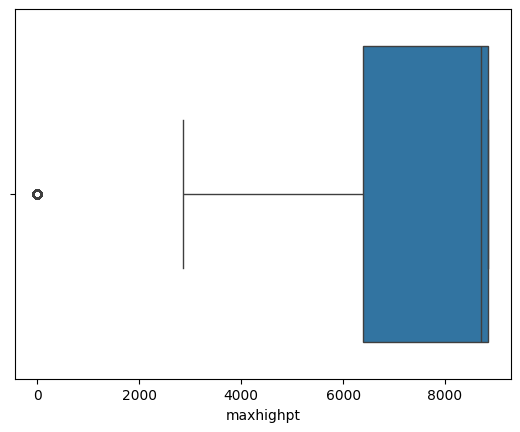

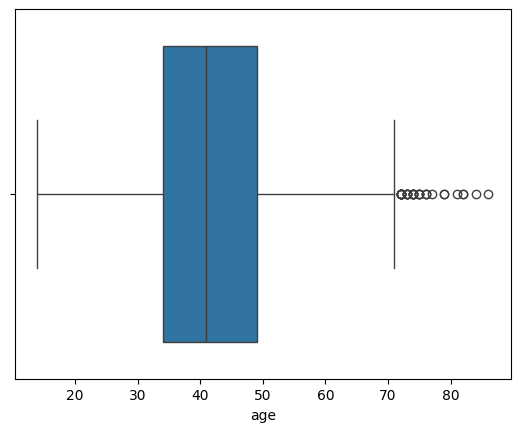

In [14]:
for col in ['maxhighpt', 'age']:
    sns.boxplot(df1[col], orient='h')
    plt.show()

## Analysis

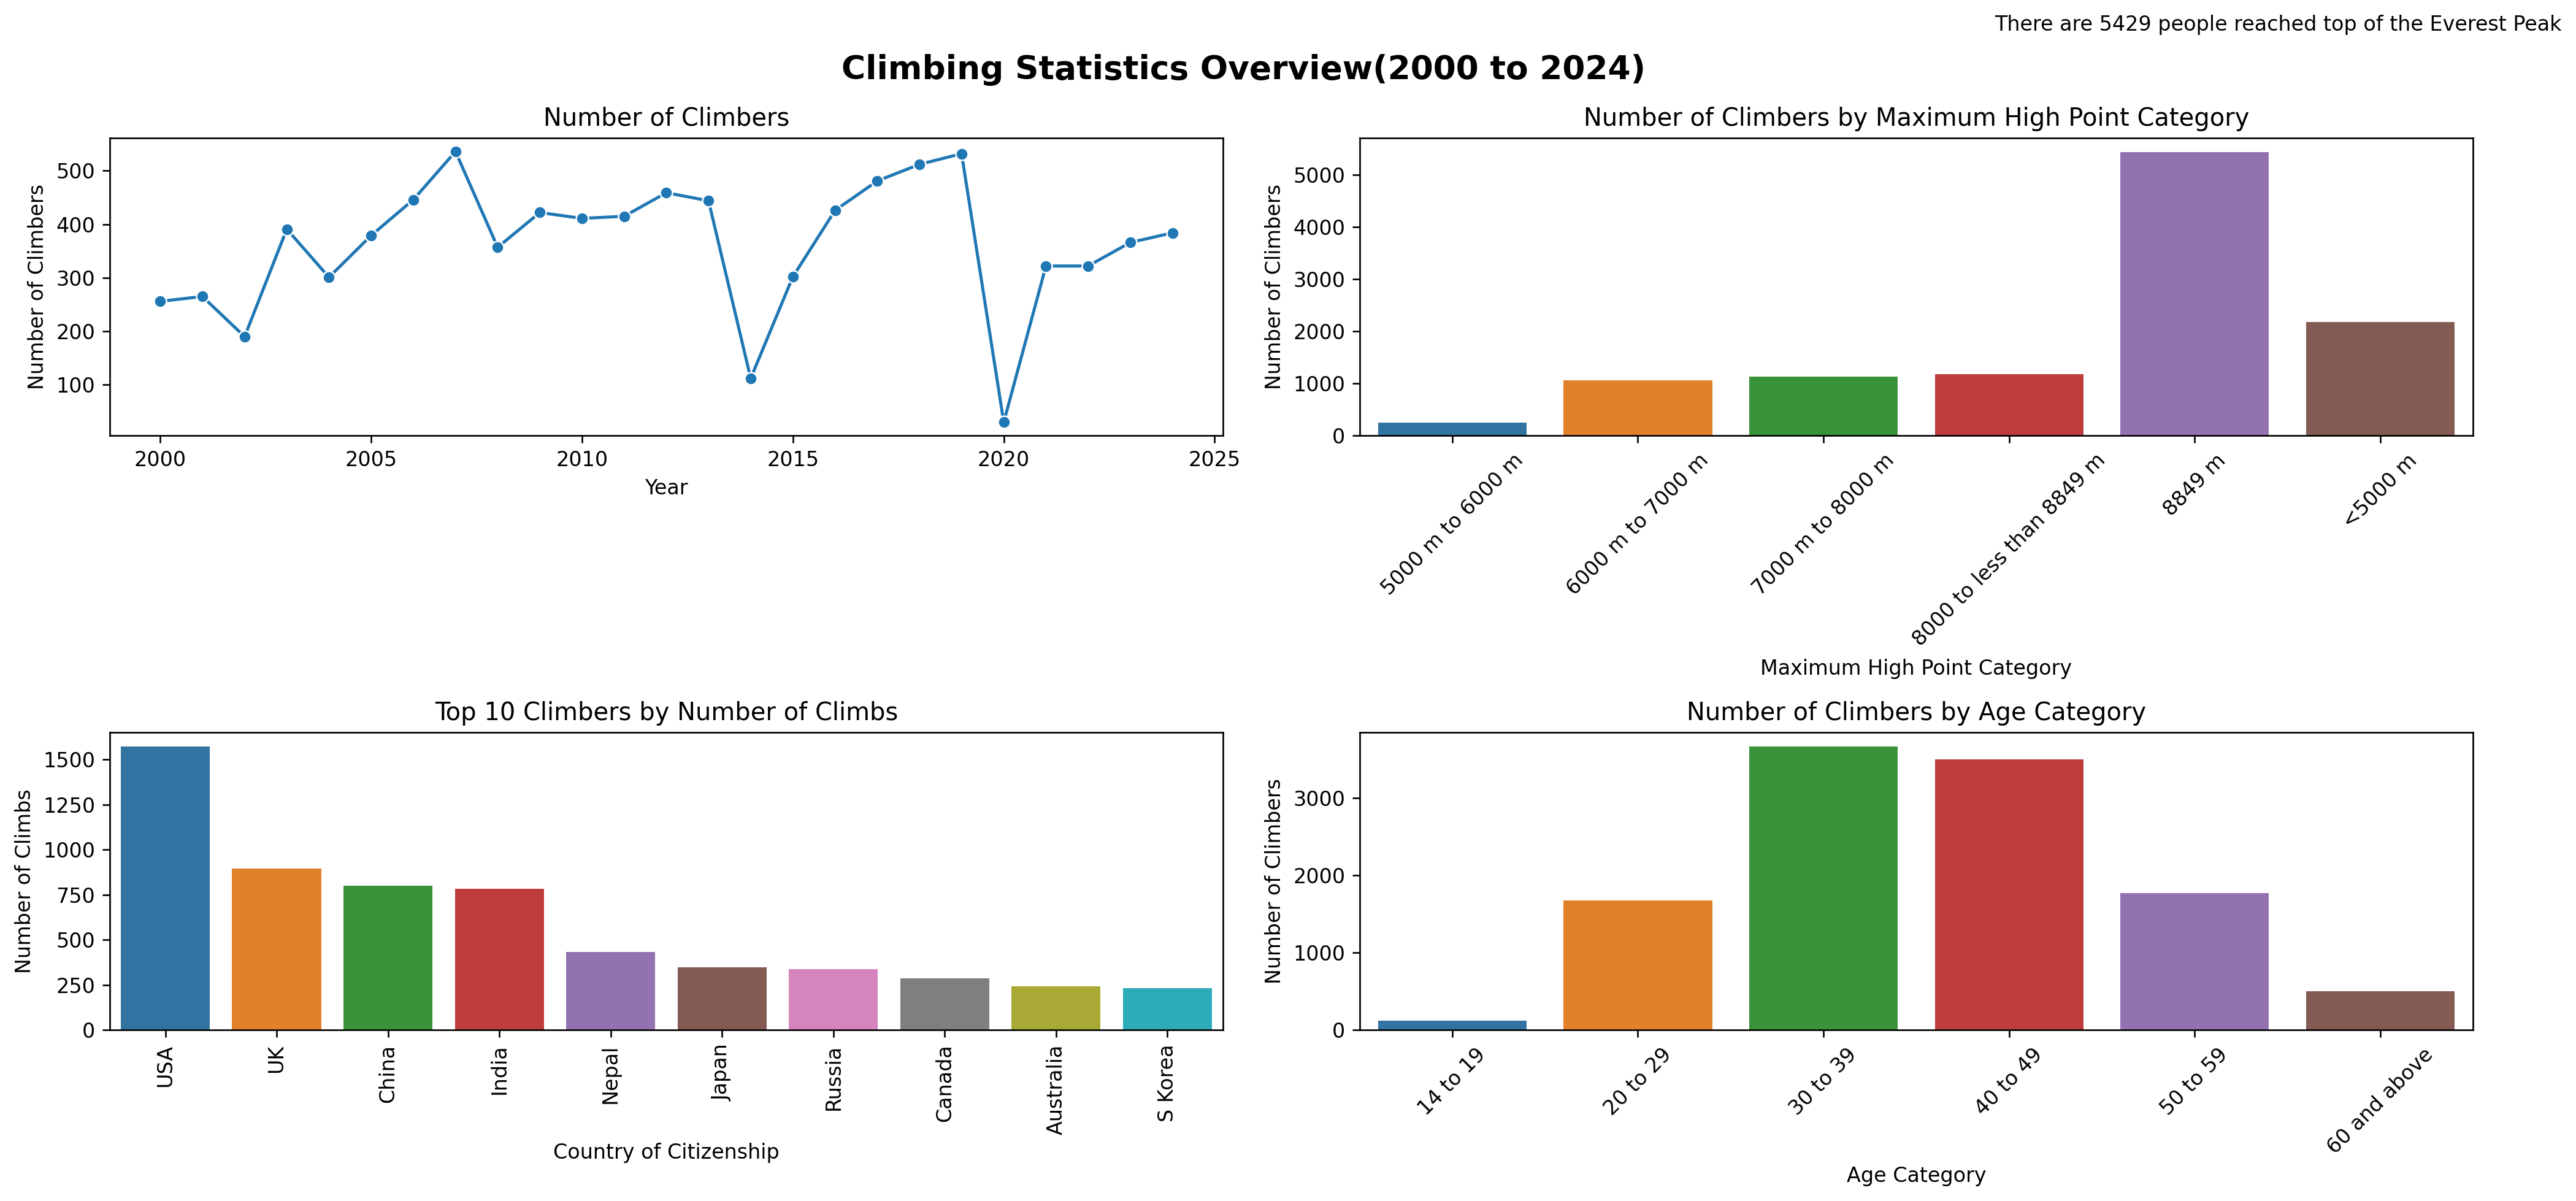

In [15]:
fig ,ax = plt.subplots(figsize=(17,8),nrows=2, ncols=2,dpi=240)

data = df[df['maxhighpt']!=0].groupby('smtmdy_year')['name'].count().reset_index()
sns.lineplot(data=data,x='smtmdy_year',y='name',marker='o',lw=1.5,estimator=sum,errorbar=None,ax=ax[0, 0])
ax[0,0].set_title('Number of Climbers')
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('Number of Climbers')


data1 = df1.groupby('maxhighpt_cat')['sex'].count()
data2= df1.groupby('maxhighpt_cat')['name'].count().reset_index()
data2.columns = ['maxhighpt_cat', 'count']
data = pd.merge(data1, data2, on='maxhighpt_cat', how='left')
sns.barplot(data=data, x='maxhighpt_cat', y='count', errorbar=None, hue = 'maxhighpt_cat',ax=ax[0, 1])
ax[0,1].set_title('Number of Climbers by Maximum High Point Category')
ax[0,1].set_xlabel('Maximum High Point Category')
ax[0,1].set_ylabel('Number of Climbers')
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)


data = df[df['maxhighpt']!=0].groupby('citizen')['name'].count().reset_index().sort_values(by='name', ascending=False)
data = data.head(10)
sns.barplot(data=data, x='citizen', y='name', errorbar=None, hue='citizen',ax=ax[1, 0]) 
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=90)
ax[1, 0].set_title('Top 10 Climbers by Number of Climbs')
ax[1, 0].set_xlabel('Country of Citizenship')
ax[1, 0].set_ylabel('Number of Climbs')



data = df1.groupby(['age_cat','maxhighpt_cat'])['name'].count().reset_index()
data = data[data['maxhighpt_cat'] != '0 m'].sort_values(by='name', ascending=False)
sns.barplot(data=data, x='age_cat', y='name', hue='age_cat', estimator=sum, errorbar=None, ax=ax[1, 1])
ax[1, 1].set_title('Number of Climbers by Age Category')
ax[1, 1].set_xlabel('Age Category')
ax[1, 1].set_ylabel('Number of Climbers')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45)

fig.suptitle('Climbing Statistics Overview(2000 to 2024)', fontsize=16, fontweight="bold")
fig.text(0.8,1,f'There are {df[df['maxhighpt']==8849]['maxhighpt'].count()} people reached top of the Everest Peak')

fig.tight_layout()
fig.show()

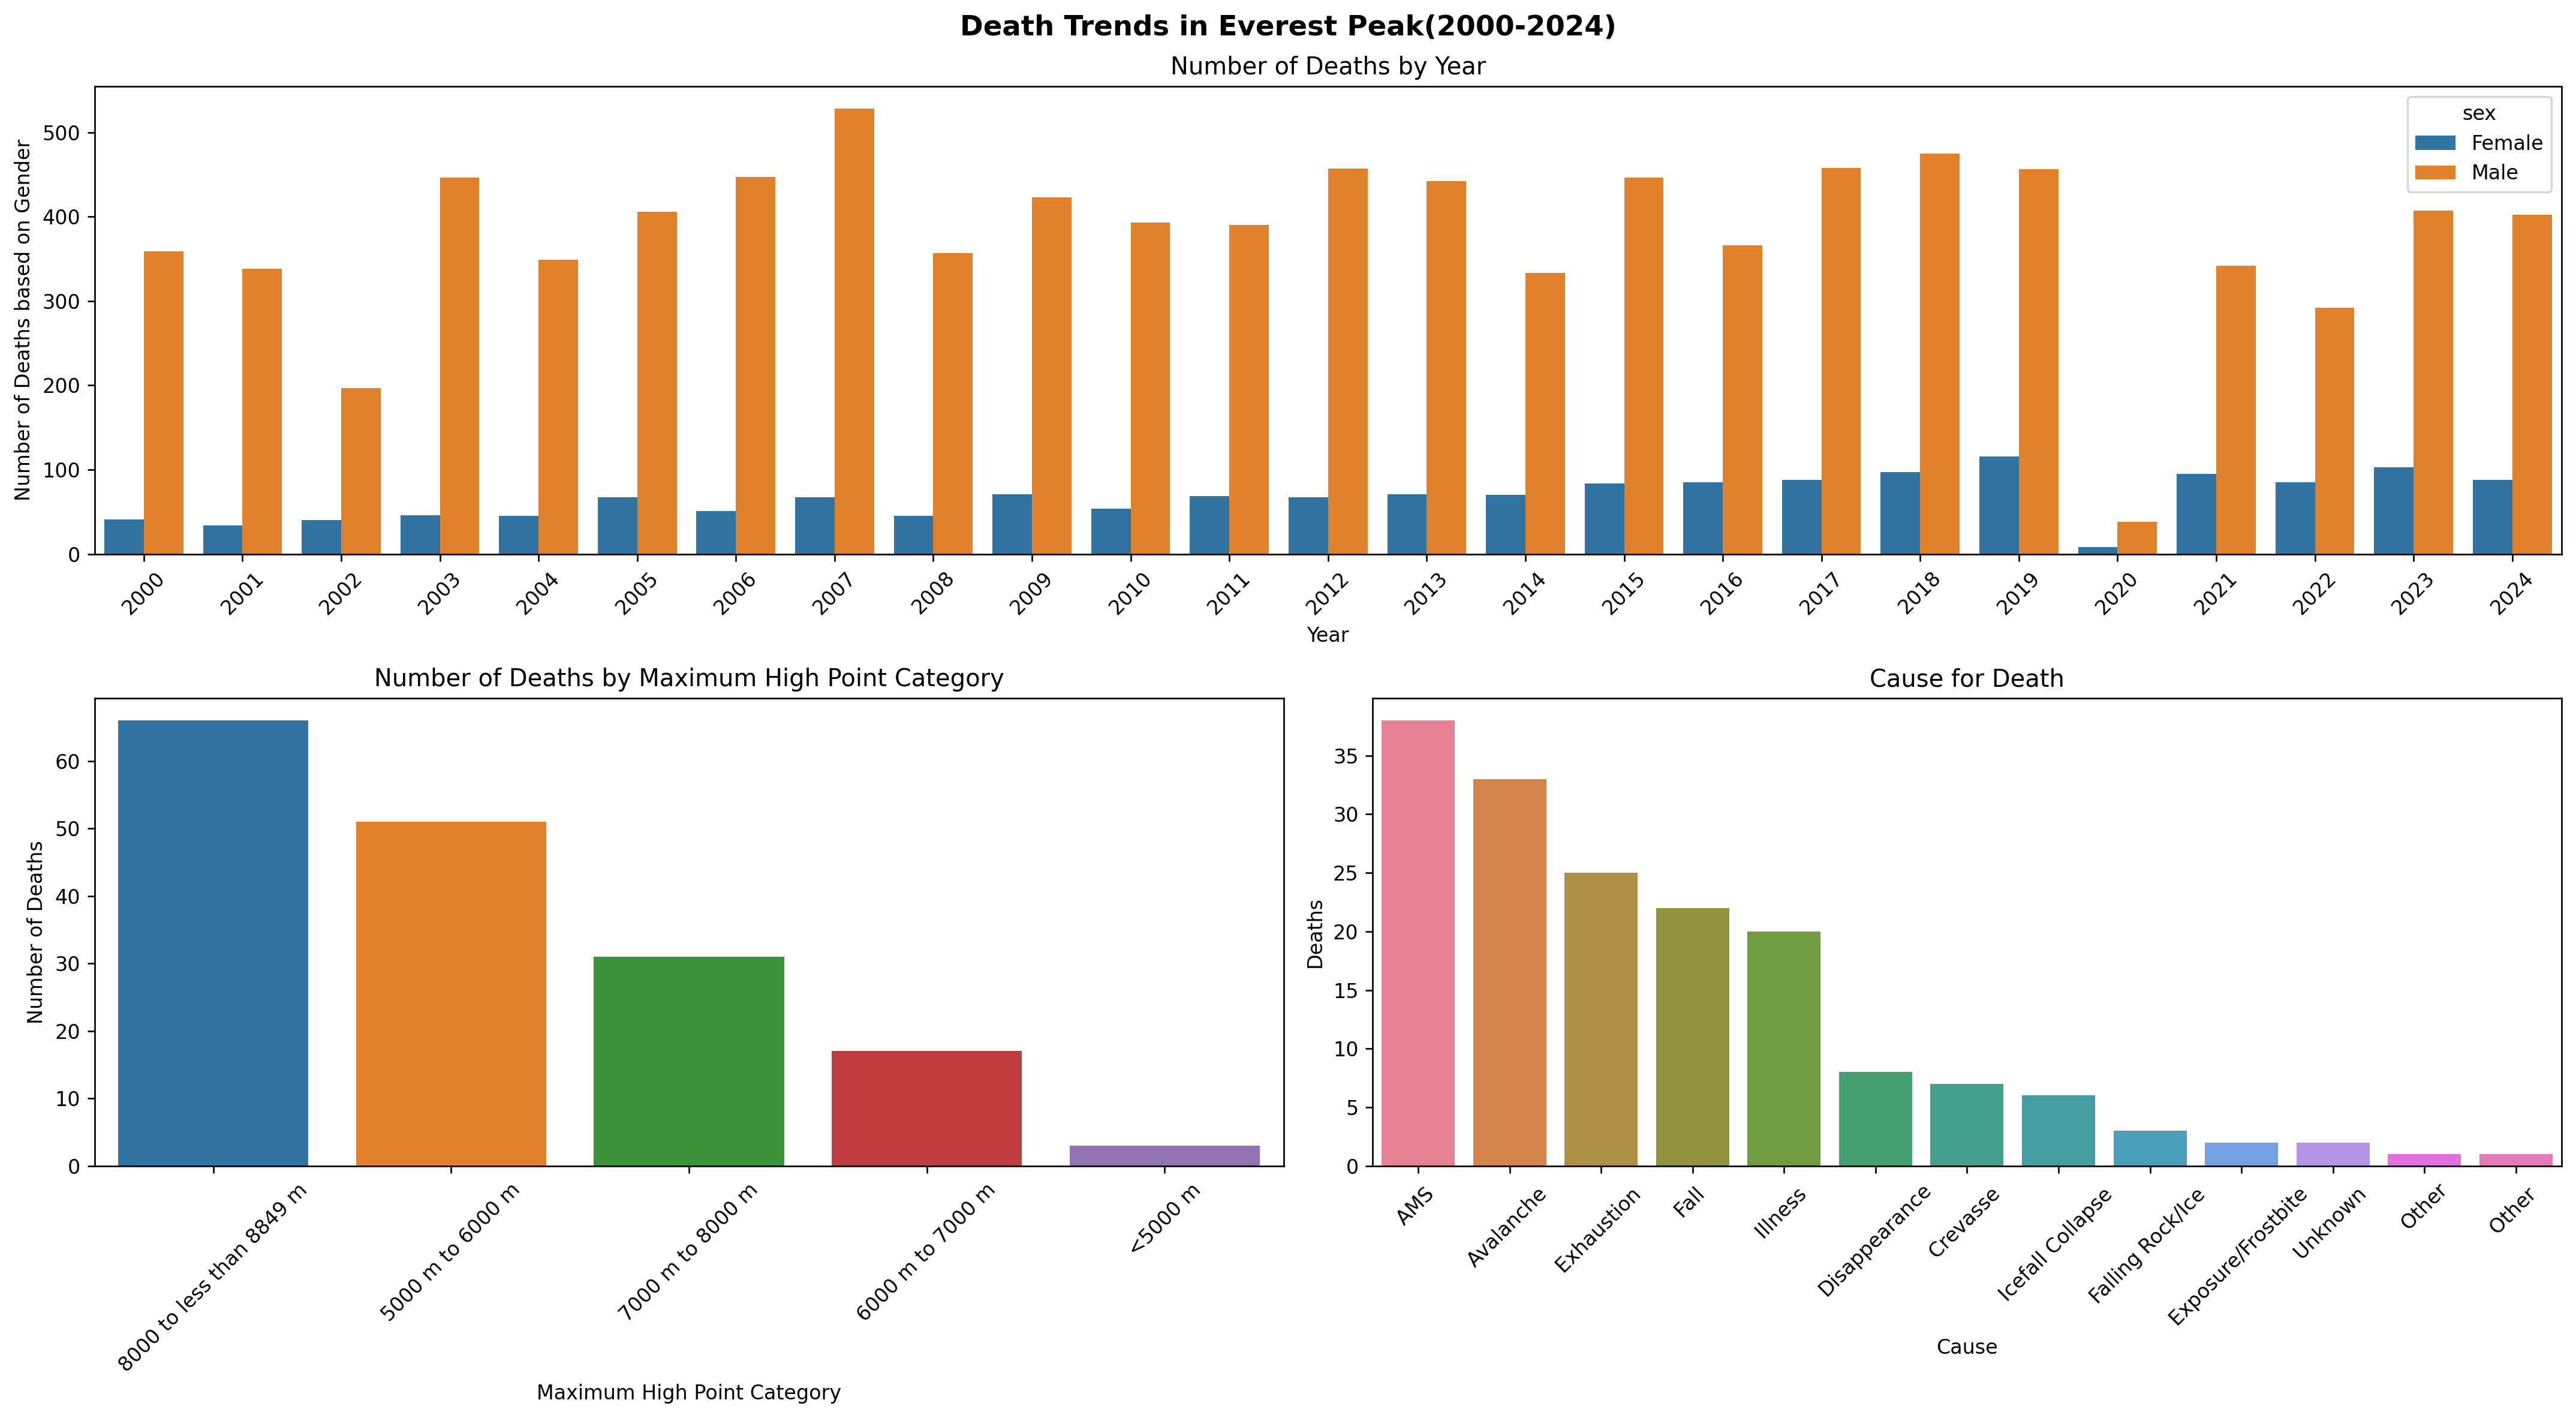

In [16]:
fig = plt.figure(figsize=(18,10),dpi=240)
gs = fig.add_gridspec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
# ax4 = fig.add_subplot(gs[2, :])

# sns.countplot(data=df[df['deathdate'].notnull()], x='yearseas', order=sorted(df['yearseas'].dropna().unique()),ax=ax1,hue='age_cat')
data = df1.groupby(['smtmdy_year','sex'])['name'].count().reset_index()
sns.barplot(data=data,x='smtmdy_year',y='name',hue='sex',order=sorted(df['smtmdy_year'].unique()),ax=ax1)
ax1.set_title('Number of Deaths by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Deaths based on Gender')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

data = df1[df1['deathdate'].notnull()].groupby('maxhighpt_cat')['sex'].count().reset_index().sort_values(by='sex',ascending=False)
sns.barplot(data=data, x='maxhighpt_cat',y='sex',ax=ax2,hue='maxhighpt_cat')
ax2.set_title('Number of Deaths by Maximum High Point Category')
ax2.set_xlabel('Maximum High Point Category')
ax2.set_xticks(data['maxhighpt_cat'].unique())
ax2.set_ylabel('Number of Deaths')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

data = df1[df1['reason']!=0].groupby('reason')['sex'].agg('count').reset_index().sort_values(by='sex', ascending=False)
sns.barplot(data=data, x='reason', y='sex', ax=ax3, hue='reason', order=data['reason'].unique())
ax3.set_title('Cause for Death')
ax3.set_xlabel('Cause')
ax3.set_ylabel('Deaths')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)



fig.suptitle('Death Trends in Everest Peak(2000-2024)',fontsize=14,fontweight='bold')
fig.tight_layout()
fig.show()

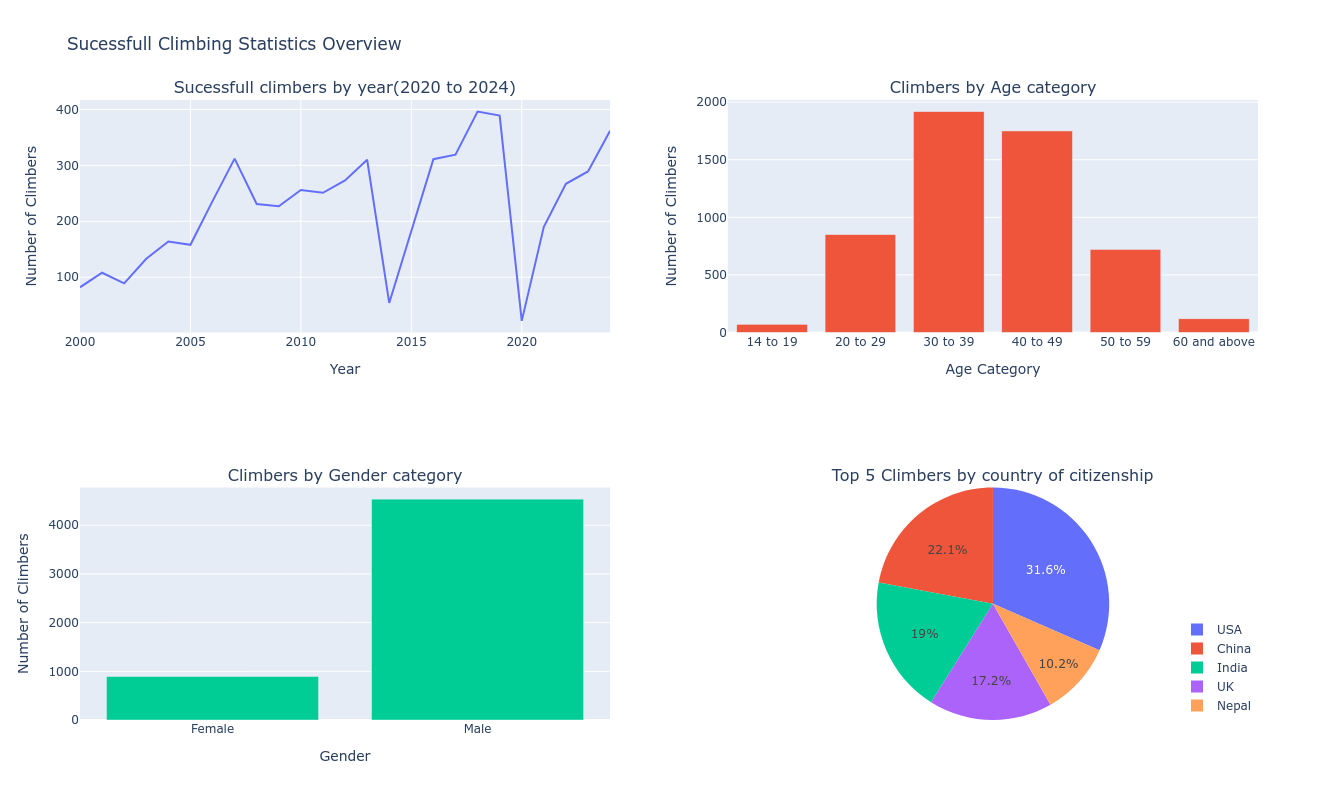

In [44]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, subplot_titles=('Sucessfull climbers by year(2020 to 2024)', 'Climbers by Age category','Climbers by Gender category', 'Top 5 Climbers by country of citizenship'),
            specs=[[{'type': 'xy'}, {'type': 'xy'}],[{'type': 'xy'}, {'type': 'domain'}]])

data = df1[df1['maxhighpt']==8849].groupby('smtmdy_year')['name'].count().reset_index()
data['smtmdy_year'] = data['smtmdy_year'].astype(int)
fig.add_trace(go.Scatter(x=data['smtmdy_year'], y=data['name'], showlegend=False), row=1, col=1)

data = df1[df1['maxhighpt']==8849].groupby('age_cat')['name'].count().reset_index()
fig.add_trace(go.Bar(x=data['age_cat'], y=data['name'], showlegend=False), row=1, col=2)

data = df1[df1['maxhighpt']==8849].groupby('sex')['name'].count().reset_index()
fig.add_trace(go.Bar(x=data['sex'], y=data['name'], showlegend=False), row=2, col=1)

data = df1[df1['maxhighpt']==8849].groupby('citizen')['name'].count().reset_index().sort_values(by='name', ascending=False).head(5)
fig.add_trace(go.Pie(labels=data['citizen'], values=data['name'], showlegend=True), row=2, col=2)

fig.update_xaxes(title_text='Year', row=1, col=1)
fig.update_yaxes(title_text='Number of Climbers', row=1, col=1)

fig.update_xaxes(title_text='Age Category', row=1, col=2)
fig.update_yaxes(title_text='Number of Climbers', row=1, col=2)

fig.update_xaxes(title_text='Gender', row=2, col=1)
fig.update_yaxes(title_text='Number of Climbers', row=2, col=1)

fig.update_xaxes(title_text='Country of Citizenship', row=2, col=2)
fig.update_yaxes(title_text='Number of Climbers', row=2, col=2)

fig.update_layout(title_text='Sucessfull Climbing Statistics Overview', height=800, width=1100,legend=dict(x=1,y=0,xanchor='right',yanchor='bottom'))

fig.show()

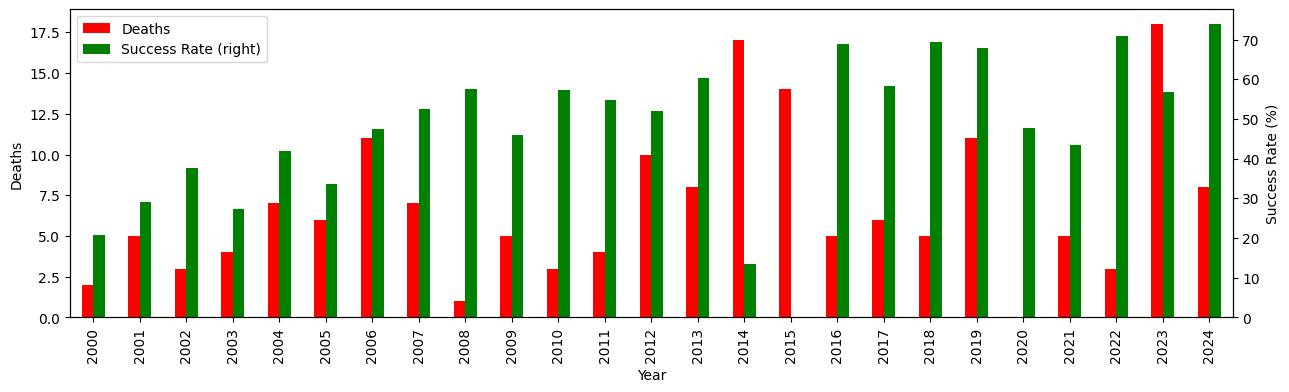

In [85]:
dd = df.groupby('smtmdy_year')['deathyear'].count().reset_index()
dd1 = df.groupby('smtmdy_year')['name'].count().reset_index()
dd = pd.merge(dd,dd1,on='smtmdy_year',how='left')
dd.rename(columns={'smtmdy_year':'Year','deathyear':'Deaths','name':'Total'},inplace=True)
dd1 = df[df['maxhighpt_cat']=='8849 m'].groupby(by='smtmdy_year')['name'].count().reset_index()
dd1.rename(columns={'smtmdy_year':'Year','name':'Finished'},inplace=True)
dd = dd.merge(dd1,on='Year',how='left')
dd=dd.fillna(0)
dd['Success Rate'] = round((dd['Finished'])/dd['Total']*100,1)

fig, ax = plt.subplots(figsize=(15, 4))

# Bar plot for Deaths and Success Rate
dd.set_index('Year')[['Deaths', 'Success Rate']].plot(
    kind='bar', secondary_y='Success Rate', ax=ax, color=['red', 'green']
)

ax.set_ylabel("Deaths")
ax.right_ax.set_ylabel("Success Rate (%)")  # Label for the secondary y-axis

plt.show()


## Key points

1. Most climbers fall within the 30 to 39 and 40 to 49 age categories.
2. Male climbers significantly outnumber female climbers, but female participation is gradually increasing.
3. The majority of successful ascents to the highest point (8849 m, Everest) are concentrated among a few countries, with Nepal, China, and the USA leading.
4. Deaths are most frequent in the highest risk at altitudes above 8000 m.
5. The main causes of death are falls, avalanches, exhaustion, and altitude-related illnesses (AMS).
6. Death Rate is aproximatly 2 to 4% on every year and sucess rate increasing year by year
